In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import mplfinance as mpf
import plotly.graph_objects as go
import plotly.offline as pyo
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as px

In [ ]:
BTC_Price = pd.read_csv("BTC-USD.csv")
Tweets = pd.read_csv("Bitcoin_tweets.csv", low_memory=False)

## Dataframe 1: Bitcoin's Price in USD over the past 8 Years

##### Showing the columns available in the Dataframe BTC_Price

In [ ]:
# print("Column Names of BTC USD")
print("------------------------")
for c in BTC_Price.columns:
  print(c)

------------------------
Date
Open
High
Low
Close
Adj Close
Volume


##### Showing the Top 5 Columns from the dataframe to understand the data

In [ ]:
BTC_Price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


#### Checking the Dimensions of the Dataframe

In [ ]:
BTC_Price.shape

(2722, 7)

##### Showing some statistical summary of the dataframe

In [ ]:
BTC_Price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03
mean,11390.914284,11696.114806,11052.436301,11402.876574,11402.876574,1.473499e+10
std,16149.953466,16581.711792,15649.920510,16152.314650,16152.314650,2.000117e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,607.005005,609.734985,604.606995,606.973022,606.973022,8.026580e+07
50%,6330.770020,6446.259766,6236.470215,6329.950195,6329.950195,5.127130e+09
75%,10535.492188,10798.729492,10234.576172,10549.329102,10549.329102,2.460973e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


##### Mutating Columns for Month and Year

In [ ]:
BTC_Price['Date'] = pd.to_datetime(BTC_Price['Date'])

BTC_Price['Year'] = pd.DatetimeIndex(BTC_Price['Date']).year
BTC_Price['Month'] = pd.DatetimeIndex(BTC_Price['Date']).month

##### Showing the count of NA Values in all the columns

In [ ]:
BTC_Price.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Year         0
Month        0
dtype: int64

##### Fixing the NA Values as the last entry didn't have any price data.

In [ ]:
BTC_Price = BTC_Price.iloc[:-1 , :]

##### Showing the count of NA Values in all the columns after fixing the data.

In [ ]:
BTC_Price.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
dtype: int64

##### Dropping the Column of Adjusted Close as it is the same as the column named Close

In [ ]:
BTC_Price = BTC_Price.drop(['Adj Close'], axis = 1)

##### Showing the final Dataframe for Bitcoin's Price

In [ ]:
BTC_Price.head()

,Date,Open,High,Low,Close,Volume,Year,Month
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,9
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9


In [ ]:
# Exporting the cleaned Dataframe

BTC_Price.to_csv('Cleaned_Price.csv')

## Dataframe 2: Tweets made about Bitcoins in the past year.

##### Showing the columns available in the Dataframe

In [ ]:
for col in Tweets.columns:
    print(col)

user_name
user_location
user_description
user_created
user_followers
user_friends
user_favourites
user_verified
date
text
hashtags
source
is_retweet


##### Showing the Top 5 Rows of the Dataframe to get an idea of the content

In [ ]:
Tweets.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


##### Showing the dimensions of the Dataframe

In [ ]:
Tweets.shape

(2339177, 13)

##### Describing the statistical data of the number of followers a user has.

In [ ]:
Tweets.describe()

,user_followers
count,2.339114e+06
mean,8.607641e+03
std,1.096670e+05
min,0.000000e+00
25%,4.400000e+01
50%,2.010000e+02
75%,1.201000e+03
max,2.413135e+07


##### Removing unwanted values from Date Column

In [ ]:
Tweets = Tweets[Tweets['date'].str.contains(("BTC|cryptocurrency|btc|Bitcoin|bitcoin|eth|ETH"))==False]

##### Mutating Columns for Time, Month and Year of the Tweet

In [ ]:
Tweets['date'] = pd.to_datetime(Tweets['date'])

Tweets['Year'] = pd.DatetimeIndex(Tweets['date']).year
Tweets['Month'] = pd.DatetimeIndex(Tweets['date']).month

##### Checking the number of NA Values

In [ ]:
Tweets.isna().sum()

user_name                31
user_location       1133881
user_description     280966
user_created              0
user_followers            0
user_friends              0
user_favourites           0
user_verified             0
date                      0
text                      0
hashtags              17009
source                 3566
is_retweet              252
Year                      0
Month                     0
dtype: int64

##### Replacing all the nan values with Not Available, No Hashtags etc for better clarity

In [ ]:
Tweets["user_location"].fillna("Not Available", inplace = True)
Tweets["hashtags"].fillna("No Hashtags", inplace = True)
Tweets["source"].fillna("Not Available", inplace = True)
Tweets["user_description"].fillna("Not Available", inplace = True)
Tweets["user_followers"].fillna(Tweets['user_followers'].mean, inplace = True)
Tweets["user_friends"].fillna(Tweets['user_friends'].mean, inplace = True)
Tweets["user_favourites"].fillna(Tweets['user_favourites'].mean, inplace = True)

#Here we are not cleaning the data for user_created,date as they are Datetime fields
#Same goes for is_retweet as we will be using the column during visualization

##### Drop rows with nan values based on user_name column

In [ ]:
Tweets = Tweets.dropna(subset=['user_name'])

##### Checking for Null Values after cleaning the data

In [ ]:
Tweets.isna().sum()

user_name             0
user_location         0
user_description      0
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags              0
source                0
is_retweet          252
Year                  0
Month                 0
dtype: int64

In [ ]:
Tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Year,Month
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,2021,2
1,CryptoND,Not Available,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,2021,2
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",No Hashtags,Twitter Web App,False,2021,2
3,Crypto is the future,Not Available,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,2021,2
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,2021,2


In [ ]:
# Exporting the cleaned Dataframe

Tweets.to_csv('Cleaned_Tweets.csv')

In [ ]:
# Plotting the Candle Stick Data on Monthly Basis

#Resampling the Daily Data to Monthly


In [ ]:
# Monthly = BTC_Price.resample('M').mean()

Data365 = BTC_Price[~(BTC_Price['Date'] < '2021-08-28')]

Data365.set_index('Date', inplace=True)

# For Monthly and change year to 2020 above
# Data365.resample('M')

In [ ]:
BTC_Price = pd.read_csv('Cleaned_Price.csv', index_col=[0])
BTC_Price['Date'] = pd.to_datetime(BTC_Price['Date'])

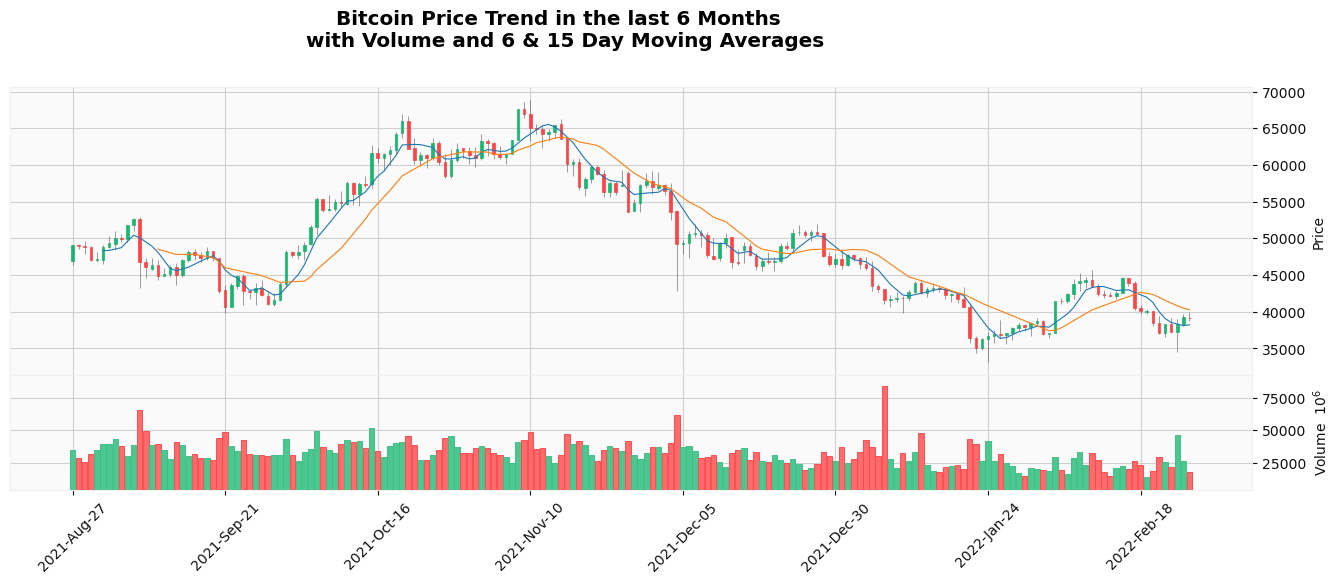

In [ ]:
mpf.plot(Data365[-185:-1], type='candle', volume=True, figratio=(21, 7), style='yahoo', mav=(6, 15), title='Bitcoin Price Trend in the last 6 Months \n with Volume and 6 & 15 Day Moving Averages')

In [ ]:
User_Data = Tweets[['user_friends','user_followers']]

User_Data.to_csv('User_Data.csv')